In [11]:
"""
🔹 CELLULE 1 – Simulation de données bruitées (Loi de Laplace)
"""
import numpy as np

N = 500_000
X = np.random.uniform(-1, 1, N)
eps = np.random.laplace(loc=0, scale=0.2, size=N)
Y = np.sin(np.pi * X) + eps


In [12]:
"""
🔹 CELLULE 2 – Approximation de la médiane conditionnelle (estimateur de Bayes)
"""
def compute_conditional_medians(X, Y, nbins=100):
    x_bins = np.linspace(X.min(), X.max(), nbins + 1)
    bin_centers = 0.5 * (x_bins[1:] + x_bins[:-1])
    medians = np.zeros(nbins)
    for i in range(nbins):
        mask = (X >= x_bins[i]) & (X < x_bins[i + 1])
        if np.any(mask):
            medians[i] = np.median(Y[mask])
        else:
            medians[i] = np.nan
    return bin_centers, medians

x_binned, y_median = compute_conditional_medians(X, Y)


In [13]:
"""
🔹 CELLULE 3 – Estimateur naïf (médiane globale)
"""
y_median_global = np.median(Y)


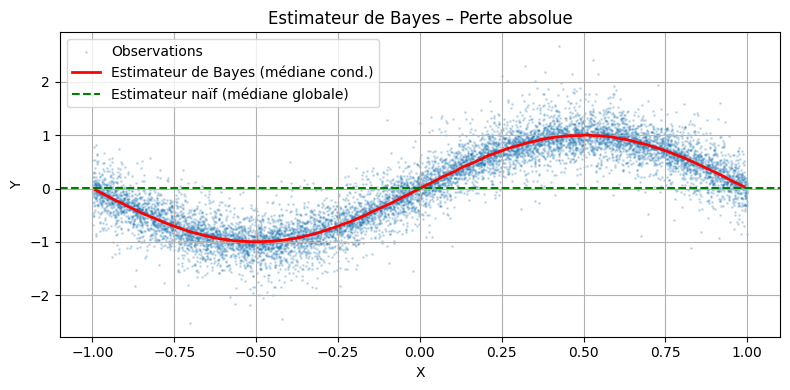

In [14]:
"""
🔹 CELLULE 4 – Visualisation : médiane conditionnelle vs naïve
"""
import matplotlib.pyplot as plt

x_vis = X[:10_000]
y_vis = Y[:10_000]

plt.figure(figsize=(8, 4))
plt.scatter(x_vis, y_vis, s=1, alpha=0.2, label="Observations")
plt.plot(x_binned, y_median, color='red', linewidth=2, label="Estimateur de Bayes (médiane cond.)")
plt.axhline(y_median_global, color='green', linestyle='--', label="Estimateur naïf (médiane globale)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimateur de Bayes – Perte absolue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("median_plot.png")
plt.show()


In [15]:
"""
🔹 CELLULE 5 – Risque empirique : MAE (Mean Absolute Error) avec Numba
"""
from numba import jit, prange

@jit(nopython=True, parallel=True)
def mae(y_pred, y_true):
    n = y_true.shape[0]
    err = 0.0
    for i in prange(n):
        err += abs(y_pred[i] - y_true[i])
    return err / n


In [16]:
"""
🔹 CELLULE 6 – Approximation continue de la médiane conditionnelle (interpolation)
"""
from scipy.interpolate import interp1d

mask = ~np.isnan(y_median)
interpolator = interp1d(x_binned[mask], y_median[mask], bounds_error=False, fill_value="extrapolate")
y_pred_bayes = interpolator(X)


In [17]:
"""
🔹 CELLULE 7 – Calcul des risques empiriques (Bayes vs Naïf)
"""
y_pred_naive = np.full_like(Y, y_median_global)

risk_bayes = mae(y_pred_bayes, Y)
risk_naive = mae(y_pred_naive, Y)


In [18]:
"""
🔹 CELLULE 8 – Résultats finaux et interprétation
"""
gain = risk_naive - risk_bayes
ratio = risk_naive / risk_bayes

print(f"Risque (MAE) de l’estimateur de Bayes : {risk_bayes:.4f}")
print(f"Risque (MAE) de l’estimateur naïf     : {risk_naive:.4f}")
print(f"Gain absolu                            : {gain:.4f}")
print(f"Ratio (naïf / Bayes)                   : {ratio:.2f}x meilleur")


Risque (MAE) de l’estimateur de Bayes : 0.2002
Risque (MAE) de l’estimateur naïf     : 0.6631
Gain absolu                            : 0.4629
Ratio (naïf / Bayes)                   : 3.31x meilleur
